In [13]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_columns', None)
df=pd.read_csv('Ravdess_TRAIN_transformed.csv')
df_test=pd.read_csv('Ravdess_TEST_transformed.csv')
df
#df scaled, var=0 and high correlated features removed, categorical features mapped

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,sum,max,q25,...,stft_sum_w4,stft_std_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,0,1,0,1,1,1,0,0.328567,-0.391762,0.342857,...,0.135483,-1.096766,-0.402429,1.421380,0.948188,0.831973,0.536448,0.0,10.826275,-2.710136
1,0,1,0,1,2,1,0,0.272964,-0.346159,0.342857,...,-0.196060,-1.013205,1.702463,1.092210,0.597843,0.441189,0.253557,0.0,0.064887,0.425032
2,0,1,0,0,1,1,0,0.337392,-0.284007,0.371429,...,-0.307833,-0.716367,-0.402429,0.899688,0.680414,0.652634,0.569396,0.0,3.519767,-1.290314
3,0,1,0,0,2,1,0,0.318693,-0.258631,0.342857,...,-0.607848,-0.803778,1.346476,0.835496,0.532143,0.515441,0.405521,0.0,0.218601,-0.015380
4,0,2,0,1,1,1,0,0.315162,-0.478371,0.342857,...,0.145139,-0.863050,1.018057,0.935801,0.644804,0.549313,0.296205,0.0,1.260594,-0.448574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0,8,0,0,2,18,1,-0.212894,-0.426884,0.371429,...,-0.631100,0.407872,-0.402429,-0.568068,0.272635,0.320467,0.493310,0.0,1.457767,-1.346654
1824,0,8,1,1,1,18,1,-0.186141,-0.196663,0.342857,...,-0.887878,0.718169,-0.402429,-0.568068,-0.402428,0.139088,0.581452,0.0,-0.162612,-0.423159
1825,0,8,1,1,2,18,1,-0.314997,-0.216890,0.371429,...,-0.910208,0.339948,-0.402429,-0.225264,-0.114307,0.022347,0.470287,0.0,0.128201,-0.378094
1826,0,8,1,0,1,18,1,-0.088892,-0.214683,0.342857,...,-0.445016,0.715166,-0.402429,-0.568068,0.037070,0.207317,0.187007,0.0,0.356091,-0.924174


In [14]:
df['emotion'].value_counts()

2    280
3    280
4    280
5    280
6    280
7    144
8    144
1    140
Name: emotion, dtype: int64

# Unbalancing emotion by considering only surprised emotion

In [15]:
emotion_demapper = {1:"neutral", 2:"calm", 3:"happy", 4:"sad", 5:"angry", 6:"fearful", 7:"disgust", 8:"surprised"}
df["emotion"] = df["emotion"].replace(emotion_demapper)
df_test["emotion"] = df_test["emotion"].replace(emotion_demapper)

emotion_mapper = {"neutral":0, "calm":0, "happy":0, "sad":0, "angry":0, "fearful":0, "disgust":0, "surprised":1}
df["emotion"] = df["emotion"].replace(emotion_mapper)
df_test["emotion"] = df_test["emotion"].replace(emotion_mapper)


# Partitioning

In [16]:
X, y = df.drop(["emotion", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "sex"], axis=1), df[["emotion"]].values.flatten()
X2, y2 = df_test.drop(["emotion", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "sex"], axis=1), df_test[["emotion"]].values.flatten()

In [17]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, y_train = X, y
X_test, y_test = X2, y2

# Imbalancing with SMOTE / SVMSMOTE / ADASYN / SMOTE-NC

In [18]:
#saving the results on a list
f1_results = []
accuracy_results = []

knn_f1 = []
knn_accuracy = []

In [19]:
from imblearn.over_sampling import KMeansSMOTE, SMOTE, SVMSMOTE, SMOTENC
from imblearn.over_sampling import RandomOverSampler, ADASYN

# The effect of resampling on classifier result

# Classifier result on unbalanced data

### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, random_state=42, criterion='gini')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#saving
f1_results.append(f1_score(y_test, y_pred))
accuracy_results.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8910256410256411
F1-score [0.94066318 0.33333333]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       576
           1       0.31      0.35      0.33        48

    accuracy                           0.89       624
   macro avg       0.63      0.64      0.64       624
weighted avg       0.90      0.89      0.89       624



### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=8, weights='distance')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#saving
knn_f1.append(f1_score(y_test, y_pred))
knn_accuracy.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9038461538461539
F1-score [0.94932432 0.0625    ]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       576
           1       0.12      0.04      0.06        48

    accuracy                           0.90       624
   macro avg       0.52      0.51      0.51       624
weighted avg       0.86      0.90      0.88       624



# Classifier result on rebalanced data

## Decision Tree+KNN / random

In [22]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, random_state=42, criterion='gini')
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

#saving
f1_results.append(f1_score(y_test, y_pred))
accuracy_results.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8397435897435898
F1-score [0.90859232 0.35064935]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       576
           1       0.25      0.56      0.35        48

    accuracy                           0.84       624
   macro avg       0.61      0.71      0.63       624
weighted avg       0.91      0.84      0.87       624



In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=8, weights='distance')
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

#saving
knn_f1.append(f1_score(y_test, y_pred))
knn_accuracy.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7996794871794872
F1-score [0.88372093 0.27745665]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       576
           1       0.19      0.50      0.28        48

    accuracy                           0.80       624
   macro avg       0.57      0.66      0.58       624
weighted avg       0.89      0.80      0.84       624



## Decision Tree+KNN / SMOTE

In [24]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, random_state=42, criterion='gini')
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

#saving
f1_results.append(f1_score(y_test, y_pred))
accuracy_results.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8333333333333334
F1-score [0.9038817  0.37349398]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       576
           1       0.26      0.65      0.37        48

    accuracy                           0.83       624
   macro avg       0.61      0.75      0.64       624
weighted avg       0.91      0.83      0.86       624



In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=8, weights='distance')
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

#saving
knn_f1.append(f1_score(y_test, y_pred))
knn_accuracy.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.75
F1-score [0.84883721 0.27777778]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       576
           1       0.18      0.62      0.28        48

    accuracy                           0.75       624
   macro avg       0.57      0.69      0.56       624
weighted avg       0.90      0.75      0.80       624



## Decision Tree+KNN / SVMSMOTE

In [26]:
svmsmote = SVMSMOTE(random_state=40)
X_resampled, y_resampled = svmsmote.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, random_state=42, criterion='gini')
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

#saving
f1_results.append(f1_score(y_test, y_pred))
accuracy_results.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8766025641025641
F1-score [0.9309417  0.42105263]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       576
           1       0.33      0.58      0.42        48

    accuracy                           0.88       624
   macro avg       0.65      0.74      0.68       624
weighted avg       0.91      0.88      0.89       624



In [210]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=8, weights='distance')
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

#saving
knn_f1.append(f1_score(y_test, y_pred))
knn_accuracy.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7868589743589743
F1-score [0.87464656 0.28877005]
              precision    recall  f1-score   support

           0       0.96      0.81      0.87       576
           1       0.19      0.56      0.29        48

    accuracy                           0.79       624
   macro avg       0.58      0.68      0.58       624
weighted avg       0.90      0.79      0.83       624



## Decision Tree+KNN / ADASYN

In [211]:
adasyn = ADASYN(random_state=43, sampling_strategy='minority', n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, random_state=42, criterion='gini')
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

#saving
f1_results.append(f1_score(y_test, y_pred))
accuracy_results.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8477564102564102
F1-score [0.91324201 0.37908497]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       576
           1       0.28      0.60      0.38        48

    accuracy                           0.85       624
   macro avg       0.62      0.74      0.65       624
weighted avg       0.91      0.85      0.87       624



In [212]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=8, weights='distance')
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

#saving
knn_f1.append(f1_score(y_test, y_pred))
knn_accuracy.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7387820512820513
F1-score [0.84097561 0.2690583 ]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       576
           1       0.17      0.62      0.27        48

    accuracy                           0.74       624
   macro avg       0.57      0.69      0.56       624
weighted avg       0.90      0.74      0.80       624



## Decision Tree+KNN / SMOTENC

In [213]:
X, y = df.drop(["emotion"], axis=1), df[["emotion"]].values.flatten()
X2, y2 = df_test.drop(["emotion"], axis=1), df_test[["emotion"]].values.flatten()

X_train, y_train = X, y
X_test, y_test = X2, y2

In [214]:
#smote_nc = smote with all categorical variables inside

smote_nc = SMOTE(random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, random_state=42, criterion='gini')
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

#saving
f1_results.append(f1_score(y_test, y_pred))
accuracy_results.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8285256410256411
F1-score [0.89990645 0.40223464]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       576
           1       0.27      0.75      0.40        48

    accuracy                           0.83       624
   macro avg       0.63      0.79      0.65       624
weighted avg       0.92      0.83      0.86       624



In [215]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=8, weights='distance')
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

#saving
knn_f1.append(f1_score(y_test, y_pred))
knn_accuracy.append(accuracy_score(y_test, y_pred))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7740384615384616
F1-score [0.86532951 0.29850746]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       576
           1       0.20      0.62      0.30        48

    accuracy                           0.77       624
   macro avg       0.58      0.71      0.58       624
weighted avg       0.90      0.77      0.82       624



# PLOT

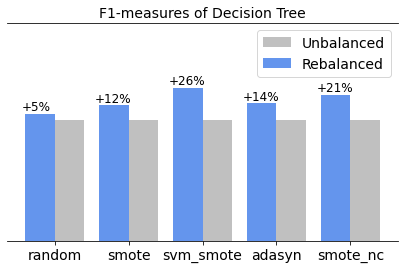

In [216]:
import matplotlib.pyplot as plt
import numpy as np

f1_measures = f1_results #non sorted -> random, smote, svmsmote, adasyn, smote_nc

# Split the list into the first f1-measure and the rest of the f1-measures
first_f1, rest_f1 = f1_measures[0], f1_measures[1:]

# Define the number of bars and the width of each bar
num_bars = len(rest_f1)
bar_width = 0.4

# Set the position of each pair of bars
x_pos = np.arange(num_bars)

# Plot the bars
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(x_pos + bar_width, [first_f1]*num_bars, bar_width, color='silver')
ax.bar(x_pos, rest_f1, bar_width, color='cornflowerblue')
ax.legend(['Unbalanced', 'Rebalanced'], fontsize=14)

plt.title('F1-measures of Decision Tree', fontsize=14)

# Add ticks and tick labels
plt.xticks(x_pos + bar_width/2, range(2, len(f1_measures)+1))
bar_names = ['random', 'smote', 'svm_smote', 'adasyn', 'smote_nc'] 
ax.set_xticklabels(bar_names, fontsize=14)
plt.ylim([0, 0.6])

# Iterate over the rest_f1 values and add the percentage increase to the end of each bar
for i, f1 in enumerate(rest_f1):  
    increase = (f1 - first_f1) / first_f1 * 100
    ax.text(i - bar_width/2 - 0.05, f1 + 0.01, f'+{increase:.0f}%', fontsize=12)

# Remove the y-axis
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(left=False, labelleft=False)

# Show the plot
plt.show()


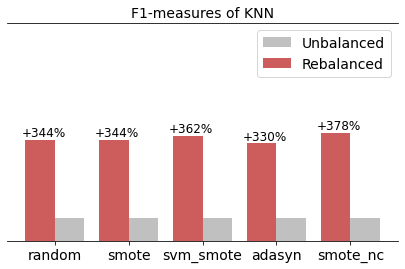

In [217]:
f1_measures = knn_f1 # List with 6 different f1-measures

# Split the list into the first f1-measure and the rest of the f1-measures
first_f1, rest_f1 = f1_measures[0], f1_measures[1:]

# Define the number of bars and the width of each bar
num_bars = len(rest_f1)
bar_width = 0.4

# Set the position of each pair of bars
x_pos = np.arange(num_bars)

# Plot the bars
fig, ax1 = plt.subplots(figsize=(7, 4))
ax1.bar(x_pos + bar_width, [first_f1]*num_bars, bar_width, color='silver')
ax1.bar(x_pos, rest_f1, bar_width, color='indianred')
ax1.legend(['Unbalanced', 'Rebalanced'], fontsize=14)

plt.title('F1-measures of KNN', fontsize=14)

# Add ticks and tick labels
plt.xticks(x_pos + bar_width/2, range(2, len(f1_measures)+1))
#plt.xticks(rotation=90)
bar_names = ['random', 'smote', 'svm_smote', 'adasyn', 'smote_nc']
ax1.set_xticklabels(bar_names, fontsize=14)
plt.ylim([0, 0.6])

# Iterate over the rest_f1 values and add the percentage increase to the end of each bar
for i, f1 in enumerate(rest_f1):  
    increase = (f1 - first_f1) / first_f1 * 100
    ax1.text(i - bar_width/2 - 0.05, f1 + 0.01, f'+{increase:.0f}%', fontsize=12)

# Remove the y-axis
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.tick_params(left=False, labelleft=False)

# Show the plot
plt.show()

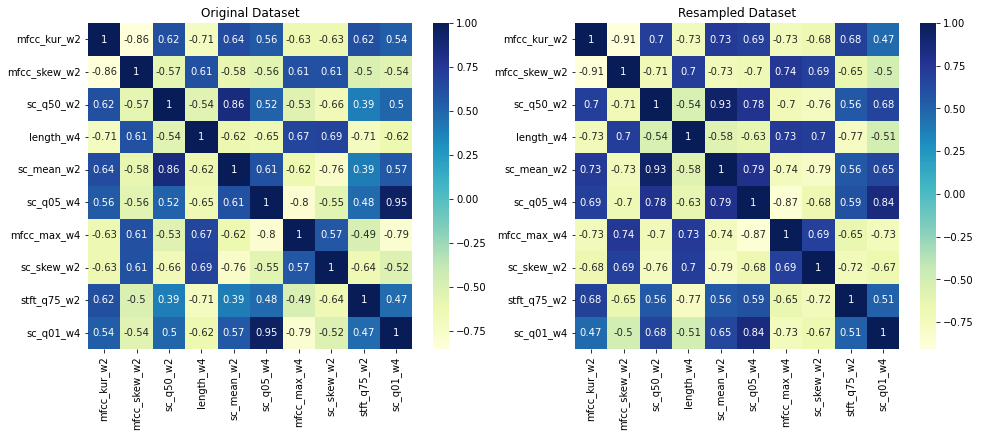

In [267]:
# Split your data into features and target
X = df.drop(columns=['emotion'])
y = df['emotion']

# Calculate the correlation between each feature and the target variable
correlations = X.corrwith(y)

# Sort the features by their correlation value
sorted_features = correlations.abs().sort_values(ascending=False)

# Select the top 50 most correlated features
top_50_features = sorted_features[:10].index.tolist()

# Keep only the top 50 most correlated features in your dataframe
X_top_50 = X[top_50_features]

# Calculate the correlation matrix for the top 50 features
corr_top_50 = X_top_50.corr()

# Create the oversampler
sampler = SVMSMOTE(random_state=40)

# Oversample the dataset
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Create a new dataframe from the resampled data
data_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

# Keep only the top 50 most correlated features in the resampled dataframe
X_resampled_top_50 = data_resampled[top_50_features]

# Calculate the correlation matrix for the top 50 features in the resampled dataframe
corr_resampled_top_50 = X_resampled_top_50.corr()

# Set up the subplots
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

# Create the first heatmap for the original dataset
sns.heatmap(corr_top_50, cmap='YlGnBu', annot=True, ax=axs[0])
axs[0].set_title('Original Dataset')

# Create the second heatmap for the resampled dataset
sns.heatmap(corr_resampled_top_50, cmap='YlGnBu', annot=True, ax=axs[1])
axs[1].set_title('Resampled Dataset')


plt.show()
